# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## Visualize Dataset
This is the same code from Assignment 1

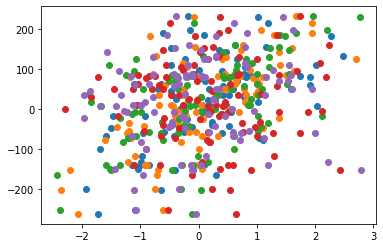

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)
plt.scatter(X[:,2],y)
plt.scatter(X[:,3],y)
plt.scatter(X[:,4],y)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Model

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(Dense(5, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
model.add(Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))

# summarizing the model structure.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,loss='mse',metrics=['mse'])

history = model.fit(X_train, y_train,epochs=100,validation_data = (X_val, y_val))

loss , mse = model. evaluate(X_test , y_test, verbose = 1)
print('MSE : %.3f' % mse)

y_pred = model.predict(X_test)


Epoch 1/100
2/2 [==============================] - 1s 174ms/step - loss: 11475.1738 - mse: 11472.9678 - val_loss: 11864.2656 - val_mse: 11862.0879
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 11441.7285 - mse: 11439.5576 - val_loss: 11846.8320 - val_mse: 11844.6846
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 11423.5332 - mse: 11421.3867 - val_loss: 11832.7158 - val_mse: 11830.5723
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 11400.7578 - mse: 11398.6055 - val_loss: 11815.8301 - val_mse: 11813.6719
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 11366.6113 - mse: 11364.4551 - val_loss: 11785.7559 - val_mse: 11783.5566
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 11286.9844 - mse: 11284.7695 - val_loss: 11726.4561 - val_mse: 11724.1699
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 11096.5234 - mse: 11094.2051 - val_loss: 11530.4307

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


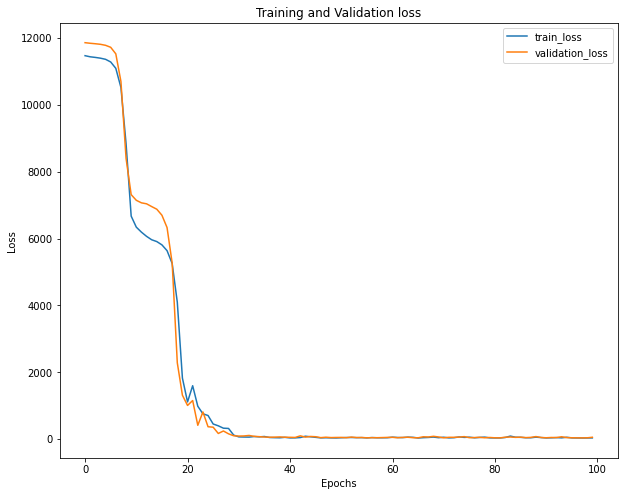

In [9]:
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(10, 8))                    
plt.plot(history.history['loss'])             
plt.plot(history.history['val_loss'])         

# ploting validation loss 
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'validation_loss'], loc='upper right')


plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [10]:
import numpy as np
from sklearn.metrics import r2_score
accu = r2_score(y_test, y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

Accuracy: 0.9946813930330999


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

1 Input Layer 
3 Hidden layer 
1 Output Layer

In [11]:
from tensorflow.keras import layers
Model = Sequential(
[
  layers.Dense(5, activation='relu', input_shape=(5,),  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
    
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(4, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
  layers.Dense(8, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),


  layers.Dense(1,  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01))
])
# summarizing the model structure.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [12]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1) 

# used adam optimizer
Model.compile(optimizer=opt,loss='mse',metrics=['mse'])
history = Model.fit(X_train, y_train,epochs=125,validation_data = (X_val, y_val))

loss , mse = model. evaluate(X_test , y_test, verbose = 1)
print('MSE : %.3f' % mse)

Epoch 1/125
2/2 [==============================] - 2s 676ms/step - loss: 11401.3867 - mse: 11396.5293 - val_loss: 11557.7842 - val_mse: 11553.1875
Epoch 2/125
2/2 [==============================] - 0s 85ms/step - loss: 11063.0361 - mse: 11058.4570 - val_loss: 10439.4736 - val_mse: 10434.7793
Epoch 3/125
2/2 [==============================] - 0s 45ms/step - loss: 9926.2676 - mse: 9921.4863 - val_loss: 7749.2466 - val_mse: 7744.0879
Epoch 4/125
2/2 [==============================] - 0s 40ms/step - loss: 7330.6978 - mse: 7325.3623 - val_loss: 7654.3208 - val_mse: 7648.4214
Epoch 5/125
2/2 [==============================] - 0s 83ms/step - loss: 7227.5615 - mse: 7221.6362 - val_loss: 5410.4082 - val_mse: 5404.4766
Epoch 6/125
2/2 [==============================] - 0s 90ms/step - loss: 5873.7803 - mse: 5867.8442 - val_loss: 5526.4331 - val_mse: 5520.4463
Epoch 7/125
2/2 [==============================] - 0s 60ms/step - loss: 6018.2114 - mse: 6012.1709 - val_loss: 5182.1021 - val_mse: 5175.84

**Plot Loss**

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


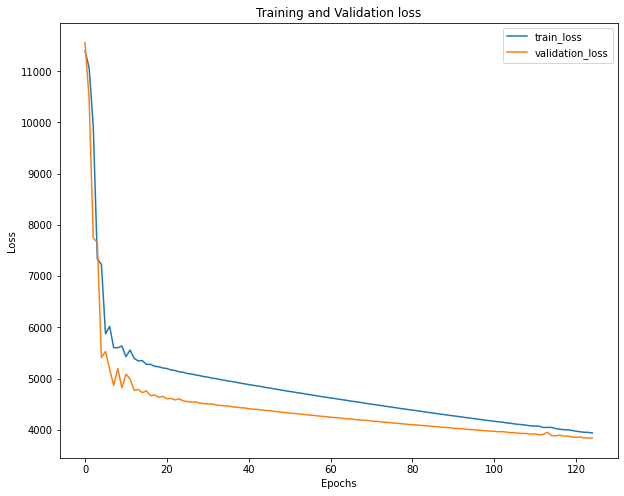

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(10, 8))                    
plt.plot(history.history['loss'])             
plt.plot(history.history['val_loss'])         

# ploting validation loss 
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'validation_loss'], loc='upper right')


plt.show()

**Accuracy**

In [14]:
import numpy as np
from sklearn.metrics import r2_score
accu = r2_score(y_test, y_pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

Accuracy: 0.9946813930330999
